# Задание 5

У Юры есть датасет, содержащий 15 объектов и 2 признака, причём точки, соответствующие объектам, являются вершинами правильного 15-угольника. Юра тестирует на этом датасете алгоритм k-means (количество кластеров `k=3`, стандартная евклидова метрика на плоскости), состоящий из следующих шагов.
Из точек датасета случайно выбираются 3 точки `C1`, `C2`, `C3` – изначальные центры кластеров.

Пока разбиение на кластеры не стабилизируется:
- (E-шаг) Каждая точка `A` датасета относится к кластеру, который соответствует ближайшему центру: значение кластера равно значению `k`, для которого величина `||A − Ck||` минимальна.
- (M-шаг) Центром `Ck` каждого кластера назначается центр масс точек данного кластера.

Юра не терпит неопределенностей и не хочет долго ждать, поэтому ему хочется, чтобы выполнялось два условия.
- При первом выполнении E-шага каждая точка однозначно отнесётся к ближайшему центру: ни для одной точки `A` из датасета не будет двух центров кластеров на одном и том же минимальном расстоянии от `A`.
- Кластеризация после второго выполнение E-шага полностью совпадёт с кластеризацией после первого выполнения Е-шага, и алгоритм завершится.

Найдите вероятность того, что при случайной инициализации центров кластеров эти два условия будут выполнены.

<Axes: >

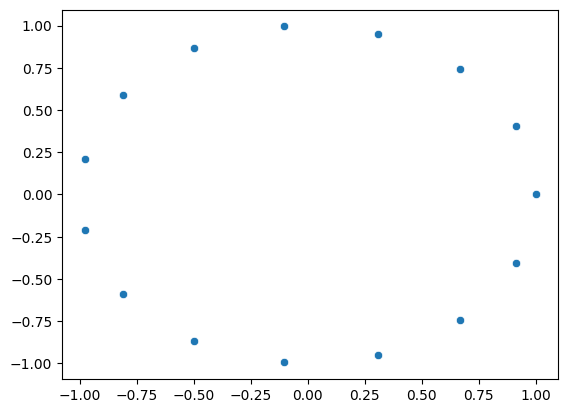

In [1]:
import numpy as np
import seaborn as sns
from math import pi

# Emulate regular polygon as points on circle of radius one
def to_points(x):
    coeff = (2 * pi) / 15
    angles = coeff * x
    return np.column_stack((np.cos(angles), np.sin(angles)))

x_indices = range(15)
X = np.fromiter(x_indices, dtype=np.float64)
X = to_points(X)
sns.scatterplot(x=X[..., 0], y=X[..., 1])

In [2]:
from itertools import combinations
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances_argmin

total = 0
correct = []

for centers in combinations(x_indices, 3):
    total += 1
    center_coords = X[centers, :]
    d = distance_matrix(X, center_coords)
    clusters = np.argmin(d, axis=1)

    # First rule
    bad = False
    for i in x_indices:
        cluster = clusters[i]
        distances = d[i]
        bad = bad or np.isclose(distances[cluster], np.min(distances[cluster != range(3)]))
    if bad:
        continue

    # Second rule
    new_centers = np.array([X[clusters == i].mean(0) for i in range(3)], dtype=np.float64)
    new_clusters = pairwise_distances_argmin(X, new_centers)
    if np.alltrue(new_clusters == clusters):
        correct.append(centers)

In [3]:
from math import gcd

hi = len(correct)
lo = total
c = gcd(hi, lo)

hi //= c
lo //= c
print(f'{hi}/{lo}')

1/13


In [4]:
correct

[(0, 3, 8),
 (0, 3, 10),
 (0, 5, 8),
 (0, 5, 10),
 (0, 5, 12),
 (0, 7, 10),
 (0, 7, 12),
 (1, 4, 9),
 (1, 4, 11),
 (1, 6, 9),
 (1, 6, 11),
 (1, 6, 13),
 (1, 8, 11),
 (1, 8, 13),
 (2, 5, 10),
 (2, 5, 12),
 (2, 7, 10),
 (2, 7, 12),
 (2, 7, 14),
 (2, 9, 12),
 (2, 9, 14),
 (3, 6, 11),
 (3, 6, 13),
 (3, 8, 11),
 (3, 8, 13),
 (3, 10, 13),
 (4, 7, 12),
 (4, 7, 14),
 (4, 9, 12),
 (4, 9, 14),
 (4, 11, 14),
 (5, 8, 13),
 (5, 10, 13),
 (6, 9, 14),
 (6, 11, 14)]

In [5]:
def get_clusters(permutation):
    centers = X[permutation, :]
    clusters = pairwise_distances_argmin(X, centers)
    return clusters

In [6]:
for permutation in correct:
    print(get_clusters(permutation))

[0 0 1 1 1 1 2 2 2 2 2 2 0 0 0]
[0 0 1 1 1 1 1 2 2 2 2 2 2 0 0]
[0 0 0 1 1 1 1 2 2 2 2 2 0 0 0]
[0 0 0 1 1 1 1 1 2 2 2 2 2 0 0]
[0 0 0 1 1 1 1 1 1 2 2 2 2 2 0]
[0 0 0 0 1 1 1 1 1 2 2 2 2 0 0]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 0]
[0 0 0 1 1 1 1 2 2 2 2 2 2 0 0]
[0 0 0 1 1 1 1 1 2 2 2 2 2 2 0]
[0 0 0 0 1 1 1 1 2 2 2 2 2 0 0]
[0 0 0 0 1 1 1 1 1 2 2 2 2 2 0]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 0]
[0 0 0 0 0 1 1 1 1 1 1 2 2 2 2]
[0 0 0 0 1 1 1 1 2 2 2 2 2 2 0]
[0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 2 2 2 2 2 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[2 0 0 0 0 1 1 1 1 1 1 2 2 2 2]
[0 0 0 0 0 0 1 1 1 1 1 2 2 2 2]
[2 0 0 0 0 0 1 1 1 1 1 1 2 2 2]
[0 0 0 0 0 1 1 1 1 2 2 2 2 2 2]
[2 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 0 1 1 1 1 2 2 2 2 2]
[2 0 0 0 0 0 1 1 1 1 1 2 2 2 2]
[2 0 0 0 0 0 0 1 1 1 1 1 2 2 2]
[2 0 0 0 0 0 1 1 1 1 2 2 2 2 2]
[2 2 0 0 0 0 1 1 1 1 1 2 2 2 2]
[2 0 0 0 0 0 0 1 1 1 1 2 2 2 2]
[2 2 0 0 0 0 0 1 1 1 1 1 2 2 2]
[2 2 0 0 0 0 0 0 1 1 1 1 1 2 2]
[2 2 0 0